# Write a program to choose a point $(X,Y)$ *at random* in a square of size 20x20, doing this 10,000 times

# Record the fraction of points that:

## i) Lie within 19 of the centre

## ii) Lie within 8 and 10 of the centre

## iii) Condition ii) but in the first quadrant

In [1]:
import numpy as np

In [6]:
def sim(n):
    array = np.random.uniform(0, 20, size = [n,2])
    
    return array

### Let's test it out

In [8]:
results = sim(10)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

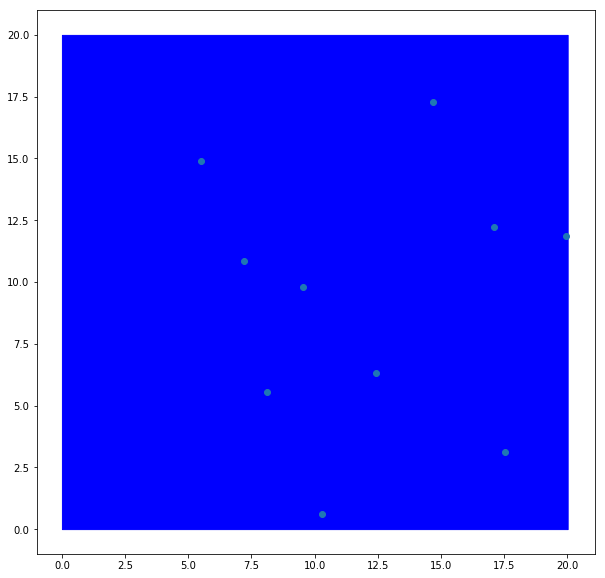

In [29]:
x = np.arange(0, 20.01, 0.01)

plt.fill_between(x, 20, 0,  color = 'b')
plt.scatter(results[:,0], results[:,1])
plt.show()

### Now actually trying it

In [34]:
def checker(x,y, r):
    R = np.sqrt((x-10)**2 + (y-10)**2)
    return (R<=r)*1

In [37]:
checker = np.vectorize(checker)

## i) We know that the whole area is contained within a circle of radius 19, so all points satisfy this condition

## ii) Now, we create the array

In [38]:
array = sim(10000)

In [43]:
(np.sum(checker(array[:,0], array[:,1], 10)) - np.sum(checker(array[:,0], array[:,1], 8)))/10000

0.28220000000000001

#### In Exercise 4, we found that the probability of the points falling in a certain ring is given by $\frac{\pi (10^{2} - 8^{2})}{\text{Total Area}} = \frac{36\pi}{400} = 0.2827$

### This agrees!

# iii)

### We need to define an additional checker function

### If the point lies in the first quadrant, x > 10 and y > 0

In [51]:
def checker2(x, y):
    if (x>10)&(y>10):
        return 1
    else:
        return 0

In [52]:
checker2 = np.vectorize(checker2)

In [53]:
array1 = checker2(array[:,0], array[:,1])
(np.sum(checker(array[:,0], array[:,1], 10)*array1) - np.sum(checker(array[:,0], array[:,1], 8)*array1))/10000

0.070699999999999999

### From Exercise 4, we know that this value should be about 1/4 the value from ii)

In [55]:
0.2827*0.25

0.070675

## This agrees!